<a href="https://colab.research.google.com/github/Mystorius/project_terror/blob/master/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [0]:
def get_train_test():
    file = 'data_ml.csv'
    df = pd.read_csv(file, sep=";", header=0, encoding="ISO-8859-1", low_memory=False)
    #df_X = df.drop(['gname','Unnamed: 0'], axis=1)
    df_X = df.drop(['gname','Unnamed: 0', 'weaptype3', 'nhostkid', 'weaptype2', 'property', 'propextent', 'weaptype1', 'nperps', 'region'], axis=1)
    df_y = df['gname'].values
    
    label_encoder = LabelEncoder()
    df_y_int = label_encoder.fit_transform(df_y)
    
    return train_test_split(df_X, df_y, test_size=0.33, random_state=42)

X_train, X_test, y_train, y_test = get_train_test()

# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_estimators=15)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(X_train, y_train)

# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
y_pred = clf.predict(X_test)

score = clf.score(X_train, y_train)
print('TRAIN ', score)

score = clf.score(X_test, y_test)
print('TEST ', score)

score = accuracy_score(y_test, y_pred)
print('TEST2 ', score)

errors = 0
correct = 0
for i in range(0, len(y_pred)):
  if y_pred[i] == y_test[i]:
    correct += 1
  else:
    errors += 1
print(errors, correct, errors+correct)
print(correct/len(y_pred))

In [0]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


[0.08216801 0.10179257 0.09221553 0.17471335 0.1913673  0.04787733
 0.04258586 0.08482016 0.06857983 0.0585605  0.05531957]
Index(['imonth', 'iday', 'country', 'latitude', 'longitude', 'attacktype1',
       'targtype1', 'targsubtype1', 'natlty1', 'nkill', 'nwound'],
      dtype='object')
Feature ranking:
1. feature longitude (0.191367)
2. feature latitude (0.174713)
3. feature iday (0.101793)
4. feature country (0.092216)
5. feature targsubtype1 (0.084820)
6. feature imonth (0.082168)
7. feature natlty1 (0.068580)
8. feature nkill (0.058560)
9. feature nwound (0.055320)
10. feature attacktype1 (0.047877)
11. feature targtype1 (0.042586)


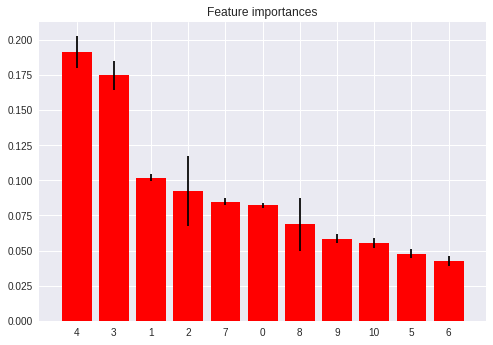

In [0]:
importances = clf.feature_importances_
print(importances)
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
feature_names = X_test.columns
print(feature_names)
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [0]:
rf_small = RandomForestClassifier(n_estimators=2, max_depth = 20)
rf_small.fit(X_train, y_train)

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf_small.estimators_[0]

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf_small.estimators_[0]

# Export the image to a dot file
#class_names = y_train
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_test.columns, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

NameError: ignored